In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
xxgb = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)

In [4]:
sample = pd.read_csv('data/sample_submission.csv', index_col=0)

In [5]:
train = pd.read_csv('./data/train.csv', index_col=0)

In [6]:
unique_labels = np.array(sample.columns)
label_dict = {val: i for i, val in enumerate(unique_labels)}
i2lb = {v:k for k, v in label_dict.items()}
labels = train['type']

In [7]:
# scaler = StandardScaler()
trainDrop = train.drop(columns=['type', 'fiberID'])

# trainDrop['type'] = train['type'].replace(label_dict)

# _mat = scaler.fit_transform(trainDrop)
# trainDrop = pd.DataFrame(_mat, columns=trainDrop.columns, index=trainDrop.index)
trainDrop['type'] = labels.replace(label_dict)

In [8]:
trainDrop.head()
# train.head()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type
id,,,,,,,,,,,,,,,,,,,,,
0,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,...,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,8
1,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,...,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,8
2,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,...,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,8
3,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,...,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,8
4,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,...,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,10


In [9]:
trainDrop.corr()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type
psfMag_u,1.000000,0.007163,0.008022,0.008373,0.007613,0.999612,0.001737,0.005493,0.007417,0.005179,...,0.006210,0.007035,0.005979,0.006911,0.005475,0.005218,0.006855,0.006553,0.009054,0.000405
psfMag_g,0.007163,1.000000,0.656575,0.675570,0.529464,0.018975,0.147544,0.246507,0.479143,0.376652,...,0.611664,0.139764,0.489554,0.458087,0.211310,0.485867,0.637270,0.424497,0.624421,0.004215
psfMag_r,0.008022,0.656575,1.000000,0.537715,0.451904,0.013608,0.120586,0.350773,0.498966,0.378253,...,0.535407,0.487657,0.449181,0.677228,0.450860,0.550238,0.516004,0.590266,0.538881,-0.001561
psfMag_i,0.008373,0.675570,0.537715,1.000000,0.648709,0.018252,0.134389,0.352580,0.505415,0.385155,...,0.682430,0.471127,0.523036,0.363586,0.557699,0.452765,0.523340,0.581413,0.640439,0.001636
psfMag_z,0.007613,0.529464,0.451904,0.648709,1.000000,0.018465,0.121613,0.302411,0.557741,0.535643,...,0.586643,0.552653,0.657507,0.419934,0.311835,0.448141,0.347738,0.658930,0.628597,0.001772
fiberMag_u,0.999612,0.018975,0.013608,0.018252,0.018465,1.000000,0.003690,0.002805,0.016168,0.013710,...,0.017214,0.012957,0.015468,0.007720,0.013842,0.014747,0.020647,0.007937,0.018597,0.000370
fiberMag_g,0.001737,0.147544,0.120586,0.134389,0.121613,0.003690,1.000000,0.063919,0.119069,0.062515,...,0.109501,0.066799,0.109731,0.099121,0.101207,0.112340,0.090383,0.099054,0.139623,0.000461
fiberMag_r,0.005493,0.246507,0.350773,0.352580,0.302411,0.002805,0.063919,1.000000,0.492312,0.340019,...,0.426770,0.171021,0.225000,0.012828,0.333907,0.411668,0.273085,0.485412,0.330141,0.000283
fiberMag_i,0.007417,0.479143,0.498966,0.505415,0.557741,0.016168,0.119069,0.492312,1.000000,0.507972,...,0.552945,0.438867,0.521864,0.124149,0.435159,0.469454,0.585379,0.432930,0.604043,0.001331
fiberMag_z,0.005179,0.376652,0.378253,0.385155,0.535643,0.013710,0.062515,0.340019,0.507972,1.000000,...,0.401246,0.401755,0.584127,0.138575,0.388380,0.070946,0.468913,0.507037,0.510494,0.002692


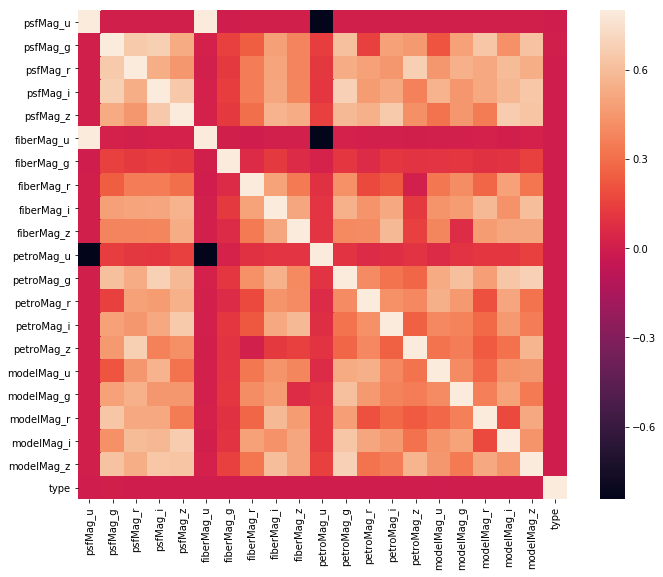

In [10]:
corrmat = trainDrop.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [11]:
columnList = train.columns
target_var = ['type']
input_var = list(filter(lambda x:x != 'type' and x != 'fiberID', columnList))

In [12]:
X_train = trainDrop[input_var]
y_train = trainDrop[target_var]

In [13]:
X_train.shape

(199991, 20)

In [14]:
X_train.head()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,
0,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [15]:
X_train.shape

(199991, 20)

In [16]:
y_train.shape

(199991, 1)

In [18]:
xxgb = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1)

In [20]:
eval_set = [(X_train, y_train)]
gbm = xxgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True, eval_metric='mlogloss')

[0]	validation_0-mlogloss:2.3949
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:2.11773
[2]	validation_0-mlogloss:1.92377
[3]	validation_0-mlogloss:1.77309
[4]	validation_0-mlogloss:1.65041
[5]	validation_0-mlogloss:1.54617
[6]	validation_0-mlogloss:1.4576
[7]	validation_0-mlogloss:1.3817
[8]	validation_0-mlogloss:1.31569
[9]	validation_0-mlogloss:1.2564
[10]	validation_0-mlogloss:1.20246
[11]	validation_0-mlogloss:1.1542
[12]	validation_0-mlogloss:1.11048
[13]	validation_0-mlogloss:1.07091
[14]	validation_0-mlogloss:1.03481
[15]	validation_0-mlogloss:1.00208
[16]	validation_0-mlogloss:0.972179
[17]	validation_0-mlogloss:0.94455
[18]	validation_0-mlogloss:0.919051
[19]	validation_0-mlogloss:0.895701
[20]	validation_0-mlogloss:0.8745
[21]	validation_0-mlogloss:0.854975
[22]	validation_0-mlogloss:0.836812
[23]	validation_0-mlogloss:0.820585
[24]	validation_0-mlogloss:0.804328
[25]	validation_0-mlogloss:0.789744
[26]	validation_0-mlogloss:0.

In [ ]:
gbm.predict_proba()

In [22]:
test = pd.read_csv('./data/test.csv').reset_index(drop=True)
test = test.drop(columns=['fiberID'])
test_ids = test['id']
test = test.drop(columns=['id'])
# test = pd.DataFrame(scaler.transform(test), columns=test.columns, index = test.index)

In [23]:
predTest = gbm.predict_proba(test)
predTest

array([[1.82596216e-06, 1.02250115e-05, 5.61041525e-04, ...,
        3.45094813e-05, 5.06522192e-04, 9.76208321e-05],
       [7.34015630e-05, 9.42433617e-05, 5.57496287e-06, ...,
        1.40616175e-05, 1.54010428e-04, 4.51923144e-04],
       [8.79071304e-04, 4.33992973e-05, 2.21895721e-06, ...,
        3.17808826e-06, 8.72490637e-06, 3.84816667e-05],
       ...,
       [3.77047487e-04, 3.59210768e-04, 1.12147529e-06, ...,
        3.20926461e-07, 6.79897857e-05, 1.17976971e-01],
       [2.38970970e-05, 1.73600165e-06, 2.75774755e-06, ...,
        2.49903906e-06, 8.65646598e-06, 9.32357623e-04],
       [6.86666113e-04, 3.35636651e-06, 4.26002362e-06, ...,
        1.08998165e-05, 4.77286176e-06, 5.54910221e-04]], dtype=float32)

In [24]:
sample = pd.read_csv('data/sample_submission.csv', index_col=0)
submission = pd.DataFrame(data=predTest, columns=sample.columns, index=sample.index)

In [25]:
submission

,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
id,,,,,,,,,,,,,,,,,,,
199991,0.000002,1.022501e-05,5.610415e-04,3.632887e-02,4.108771e-06,1.855390e-07,0.000200,0.000138,0.002709,2.562006e-07,9.573999e-01,0.001967,2.329832e-07,0.000034,2.792037e-06,4.015778e-06,3.450948e-05,0.000507,0.000098
199992,0.000073,9.424336e-05,5.574963e-06,9.821353e-05,4.038293e-05,4.531011e-05,0.018641,0.002230,0.299690,9.926780e-07,3.133945e-04,0.359203,3.110261e-06,0.318802,1.021079e-04,3.590301e-05,1.406162e-05,0.000154,0.000452
199993,0.000879,4.339930e-05,2.218957e-06,1.587836e-06,2.469636e-05,4.531521e-05,0.988590,0.000041,0.003795,6.009146e-08,3.315937e-06,0.004971,2.038370e-07,0.000152,1.392725e-03,7.920924e-06,3.178088e-06,0.000009,0.000038
199994,0.000132,1.076586e-04,7.831698e-07,1.245183e-05,1.130078e-04,6.206518e-05,0.000132,0.011779,0.165024,4.145701e-07,1.154276e-06,0.017582,3.979695e-05,0.020593,4.101157e-06,1.349181e-05,2.520348e-07,0.000194,0.784210
199995,0.000002,3.242861e-06,2.523923e-05,1.048291e-03,2.362939e-05,6.126466e-07,0.000296,0.000013,0.001665,1.101770e-07,9.916083e-01,0.004894,2.276166e-07,0.000225,5.466257e-05,3.538459e-06,1.850479e-06,0.000069,0.000065
199996,0.002212,6.432156e-04,3.476293e-06,3.039671e-06,8.948252e-01,5.953975e-02,0.001389,0.001746,0.022303,2.266614e-07,2.655115e-06,0.013696,2.052211e-06,0.000321,1.169032e-04,1.666666e-05,2.374505e-07,0.000040,0.003139
199997,0.000683,1.375001e-04,4.012796e-07,2.278279e-06,4.174574e-05,4.132370e-05,0.000070,0.322883,0.030983,2.360903e-07,5.246736e-07,0.007549,1.269878e-04,0.006753,7.847254e-07,7.512540e-06,1.206407e-08,0.003784,0.626936
199998,0.001306,1.229795e-05,8.354463e-06,2.216404e-06,1.981587e-05,3.432390e-02,0.000912,0.000997,0.005471,1.033396e-07,1.170021e-05,0.004715,9.356442e-07,0.000052,3.704233e-05,9.513136e-01,1.726123e-05,0.000010,0.000790
199999,0.000017,1.484224e-07,3.765493e-07,3.032323e-07,5.142079e-09,2.662098e-06,0.994301,0.000003,0.005101,1.248732e-08,1.843628e-06,0.000486,1.550404e-07,0.000072,8.218775e-07,1.873726e-06,3.723336e-08,0.000004,0.000007


In [26]:
submission.to_csv('submission3.csv', index=True)